# Pandas and Illustrator

**Do these in whatever order you'd like.** Feel free to do a bar graph, then skip ahead to some Buzzfeed line graphs, etc. Start in pandas, then once you save move on over to Illustrator.

Do each group - NYT, Buzzfeed, FiveThirtyEight, Economist, Guardian - in a different notebook.  I'm only leaving spaces in these here so you can scroll through them more easily.

Be sure to check out the other notebook for **tips and hints**.

# FiveThirtyEight: What makes Nigel Richards the best at Scrabble?

You are going to recreate the visualizations in [this piece](https://fivethirtyeight.com/features/what-makes-nigel-richards-the-best-scrabble-player-on-earth/) by [Oliver Roeder](https://twitter.com/ollie). This is one of my favorite series of charts in all of history! 

(When you break them down by divisions, though, don't draw the circles.)

![](images/sample-538.png)

**I've included the data, but there's a little work to be done:** 

* `scrabble-point-spread.csv` - the points for and against each player at Nationals from one year (2013)
* `scrabble-tournament.csv` - rating and division data for each player at Nationals from one year (2013)
* `ranked-players-with-scores.csv` - the top 200 ranked players and their average points per game (2018)

Note that the ranking data is from 2018 so the graph that uses it will look a bit different.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv("data/scrabble-point-spread.csv")
df1.head()

,player_id,points_against,points_for,tournament_id
0,6003,381,443,8163
1,20749,375,435,8163
2,19535,391,443,8163
3,18474,386,439,8163
4,583,396,450,8163


In [3]:
df2 = pd.read_csv("data/scrabble-tournament.csv")
df2.head()

,Byes,Credits,Losses,Name,New Rating,Old Rating,Other Money,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,NaN,NaN,7,Nigel Richards,2196,2168.0,NaN,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,NaN,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,NaN,NaN,8,Will Anderson,2093,2054.0,NaN,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,NaN,NaN,9,Noah Walton,2063,2015.0,NaN,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,NaN,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


In [4]:
merged = df1.merge(df2, left_on='player_id', right_on='Player ID')
merged.head()

,player_id,points_against,points_for,tournament_id,Byes,Credits,Losses,Name,New Rating,Old Rating,...,Perf Rating,Place,Player ID,Prize Money,Seed,Spread,Ties,Tournament ID,Wins,division
0,6003,381,443,8163,NaN,NaN,7,Nigel Richards,2196,2168.0,...,2356.0,1,6003,"$10,000",1,1934,NaN,8163,24,Division 1
1,20749,375,435,8163,NaN,NaN,7,Komol Panyasophonlert,2070,2002.0,...,2372.0,2,20749,"$3,000",11,1868,NaN,8163,24,Division 1
2,19535,391,443,8163,NaN,NaN,8,Will Anderson,2093,2054.0,...,2264.0,3,19535,"$2,000",2,1623,NaN,8163,23,Division 1
3,18474,386,439,8163,NaN,NaN,9,Noah Walton,2063,2015.0,...,2239.0,4,18474,"$1,000",8,1628,NaN,8163,22,Division 1
4,583,396,450,8163,NaN,NaN,10,Kenji Matsumoto,2057,2023.0,...,2212.0,5,583,$800,5,1671,NaN,8163,21,Division 1


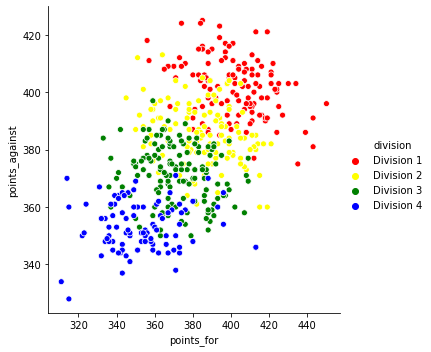

In [5]:
colors = ["red", "yellow", "green", "blue"]
sns.relplot(data=merged, x='points_for', y='points_against', hue='division', palette=colors)

In [6]:
df3 = pd.read_csv("data/ranked-players-with-scores.csv", nrows=50)

In [7]:
df3['points_for'] = df3.points_for_against.str.extract("(\d{3})-\d*", expand=False).astype(int)
df3['points_against'] = df3.points_for_against.str.extract("\d*-(\d{3})", expand=False).astype(int)

In [8]:
df3.name[2]

'\xa0Nigel Richards'

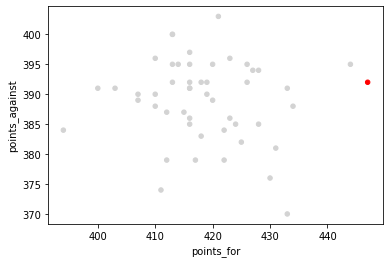

In [9]:
def build_colors(row):
    if row['name'] == '\xa0Nigel Richards':
        return 'red'
    else:
        return 'lightgrey'

colors = df3.reset_index().apply(build_colors, axis=1)

ax = df3.plot(x='points_for', y='points_against', kind='scatter', color=colors)